<a href="https://colab.research.google.com/github/leenmq33/Expo-Saudi-2030/blob/main/Reports/All%20Phases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1

# Project Goal

The goal of this project is to apply data mining techniques to classify patients by Alzheimer’s disease stage ,We aim to use clustering to group patients with similar traits and uncover hidden patterns.

# Dataset Source
The dataset was obtained from Kaggle:  
[Alzheimer’s Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset)  

# Dataset Description

to retrieve the dataset info, we need to import it as follows :


In [51]:
import pandas as pd
df = pd.read_csv("Raw_dataset.csv")


Now we can easily obtain the dataset info

Number and data types of attributes :

In [52]:
attribute_info = pd.DataFrame({
    'NameOfAttribute' : df.columns,
    'DataType' : df.dtypes.values
})
print(f"Attributes with their data types: \n")
print(attribute_info, "\n")

print("Number of attributes:", len(df.columns), "\n")

Attributes with their data types: 

              NameOfAttribute DataType
0                   PatientID    int64
1                         Age    int64
2                      Gender    int64
3                   Ethnicity    int64
4              EducationLevel    int64
5                         BMI  float64
6                     Smoking    int64
7          AlcoholConsumption  float64
8            PhysicalActivity  float64
9                 DietQuality  float64
10               SleepQuality  float64
11    FamilyHistoryAlzheimers    int64
12      CardiovascularDisease    int64
13                   Diabetes    int64
14                 Depression    int64
15                 HeadInjury    int64
16               Hypertension    int64
17                 SystolicBP    int64
18                DiastolicBP    int64
19           CholesterolTotal  float64
20             CholesterolLDL  float64
21             CholesterolHDL  float64
22   CholesterolTriglycerides  float64
23                       MMS

Number of objects :

In [53]:
print("Number of objects: ", len(df),"\n")

Number of objects:  2149 



Class attribute information

In [54]:
class_col = "Diagnosis"
print("Class attribute name: ", class_col, "\n")

Class attribute name:  Diagnosis 



Show all unique values (labels)

In [55]:
print("Possible values in the class attribute:",df[class_col].unique(), "\n")

Possible values in the class attribute: [0 1] 



Show counts for each class

In [56]:
print("Counts for each class in",df[class_col].value_counts())
print("")

Counts for each class in Diagnosis
0    1389
1     760
Name: count, dtype: int64



Sample of the raw dataset

In [57]:
print("Sample of the raw dataset:")
print(df.head())

Sample of the raw dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusio

#Phase 2


##Necessary imports

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Raw_dataset.csv")

# Part 1 :Data Summarization

##1.1 Five-number Summary
The table reports the five-number summary (minimum, Q1, median, Q3, maximum) for continuous numeric attributes only, excluding nominal variables, identifiers, and the target column.

In [59]:
TARGET_COL = "Diagnosis"

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if (df[c].nunique(dropna=True) > 10) and (c != TARGET_COL) and ("id" not in c.lower())]

five_num = df[num_cols].describe().loc[["min", "25%", "50%", "75%", "max"]]
five_num


,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,MMSE,FunctionalAssessment,ADL
min,60.0,15.008851,0.002003,0.003616,0.009385,4.002629,90.0,60.0,150.093316,50.230707,20.003434,0.005312,0.000460,0.001288
25%,67.0,21.611408,5.139810,2.570626,2.458455,5.482997,112.0,74.0,190.252963,87.195798,39.095698,7.167602,2.566281,2.342836
50%,75.0,27.823924,9.934412,4.766424,5.076087,7.115646,134.0,91.0,225.086430,123.342593,59.768237,14.441660,5.094439,5.038973
75%,83.0,33.869778,15.157931,7.427899,7.558625,8.562521,157.0,105.0,262.031657,161.733733,78.939050,22.161028,7.546981,7.581490
max,90.0,39.992767,19.989293,9.987429,9.998346,9.999840,179.0,119.0,299.993352,199.965665,99.980324,29.991381,9.996467,9.999747


The statistical summary highlights the range and distribution of numeric features. For example, Age spans 60–90, with most patients clustered around 75. Attributes like BMI, cholesterol, and MMSE show a wide range of values, reflecting variability in the dataset.

##1.2 Mean and Standard Deviation

In [60]:

stat_summary = df.select_dtypes(include='number').describe().T[['mean','std']]
stat_summary.head(10)

,mean,std
PatientID,5825.000000,620.507185
Age,74.908795,8.990221
Gender,0.506282,0.500077
Ethnicity,0.697534,0.996128
EducationLevel,1.286645,0.904527
BMI,27.655697,7.217438
Smoking,0.288506,0.453173
AlcoholConsumption,10.039442,5.757910
PhysicalActivity,4.920202,2.857191
DietQuality,4.993138,2.909055


This table shows the mean and standard deviation for each numeric attribute. High standard deviation indicates large variability, which justifies applying normalization to ensure fair comparison across features.

##2.Outliers and boxplots

Number of outliers per selected column:

Age: 0
BMI: 0
AlcoholConsumption: 0
PhysicalActivity: 0
DietQuality: 0
SleepQuality: 0
SystolicBP: 0
DiastolicBP: 0
CholesterolTotal: 0
CholesterolLDL: 0
CholesterolHDL: 0
CholesterolTriglycerides: 0
MMSE: 0
FunctionalAssessment: 0
ADL: 0


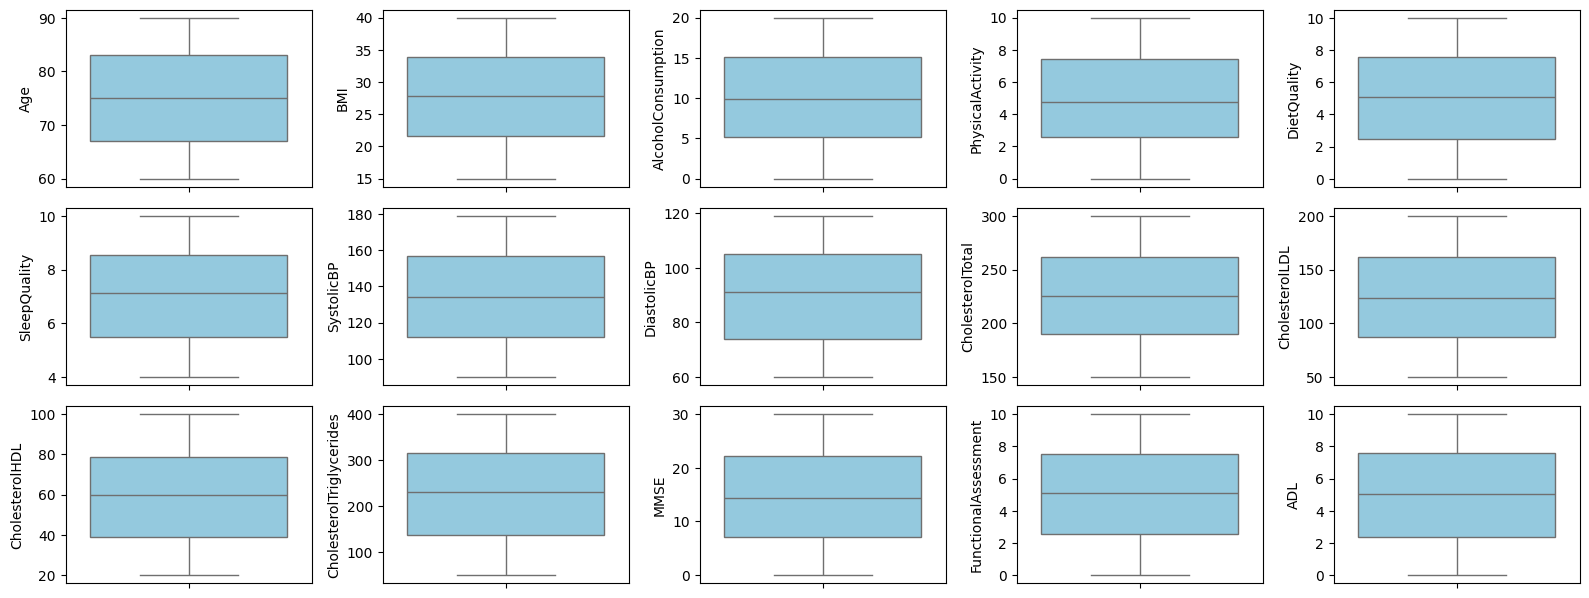

In [61]:
numeric_cols = [
    "Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality",
    "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal",
    "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides",
    "MMSE", "FunctionalAssessment", "ADL"
]

#Outlier detection function (IQR method)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Show outlier counts
print("Number of outliers per selected column:\n")
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)}")

#Boxplots for selected numeric columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col], color="skyblue")

plt.tight_layout()
plt.show()


Outlier analysis using boxplots and the IQR method shows that all numeric attributes are within normal ranges. No extreme values were found, so further outlier handling is not required.

## 3.Missing Values
We show the number of missing values per column. Columns with missing values will be handled during preprocessing.

In [62]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


We checked for missing values using "df.isnull().sum()" and found none. Therefore, no further preprocessing is required for missing data.

##4. Class Label Distribution



In [63]:
TARGET_COL = "Diagnosis"
df[TARGET_COL].value_counts()

,count
Diagnosis,
0,1389
1,760


The Diagnosis attribute is used as the class label. The distribution shows that Class 0 (No Alzheimer’s) has 1389 samples, while Class 1 (Alzheimer’s) has 760 samples. This indicates a moderate class imbalance, which is important to consider in later modeling to avoid bias toward the majority class.

##5. Graphs

##5.1 Histogram

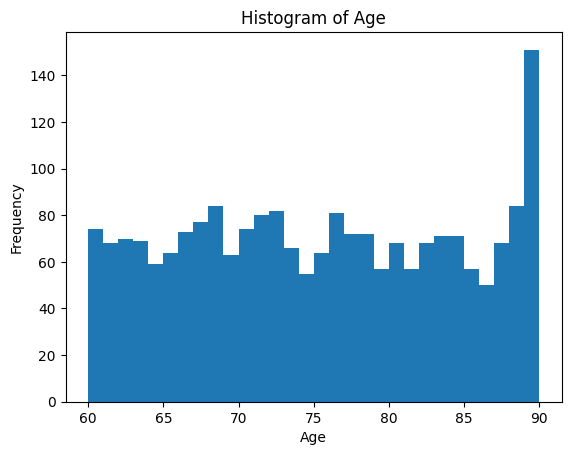

In [64]:
df["Age"].plot(kind="hist", bins=30, title="Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Description: The histogram shows that most patients are between 60 and 90 years old, with a noticeable peak at age 90, which occurs around 140 times. This indicates that the dataset is heavily skewed toward older ages, emphasizing the need to consider normalization and discretization during preprocessing.

##5.2 Scatter Plot

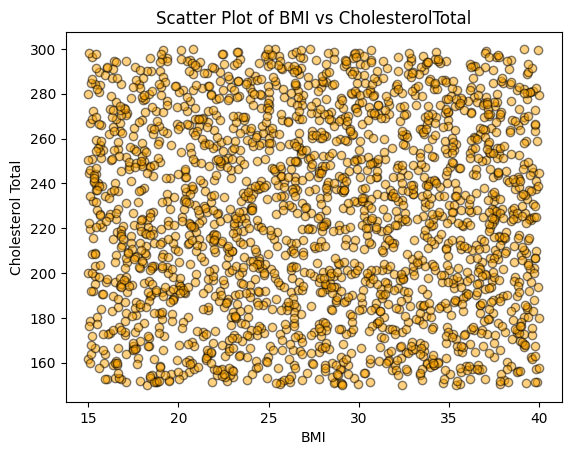

In [65]:
plt.scatter(df["BMI"], df["CholesterolTotal"], alpha=0.5, c="orange", edgecolor="black")
plt.title("Scatter Plot of BMI vs CholesterolTotal")
plt.xlabel("BMI")
plt.ylabel("Cholesterol Total")
plt.show()

Description: The scatter plot shows that patients with higher BMI often have higher cholesterol values. This is important since both are risk factors linked to Alzheimer’s and overall brain health.This suggests preprocessing like outlier handling or normalization may be needed. The plot also confirms both features are relevant for analysis.

##5.3 Bar Plot

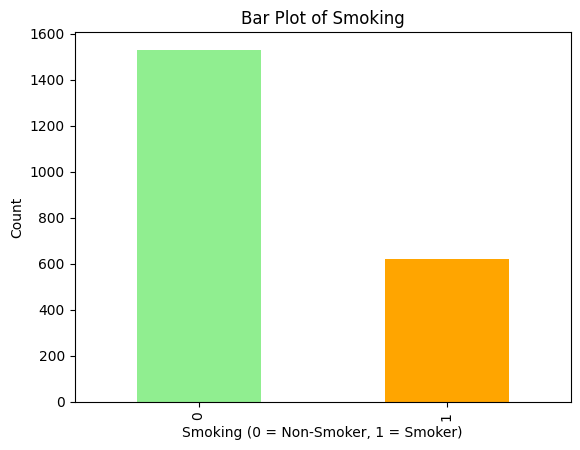

In [66]:
df["Smoking"].value_counts().plot(
    kind="bar",
    title="Bar Plot of Smoking",
    color=["lightgreen", "orange"]
)
plt.xlabel("Smoking (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Count")
plt.show()

Description: The plot shows that most patients are non-smokers, while a smaller portion are smokers. This imbalance suggests that the data may need preprocessing, such as normalization, discretization, or other techniques to make it suitable for analysis.

##5.4 Class Label Distribution

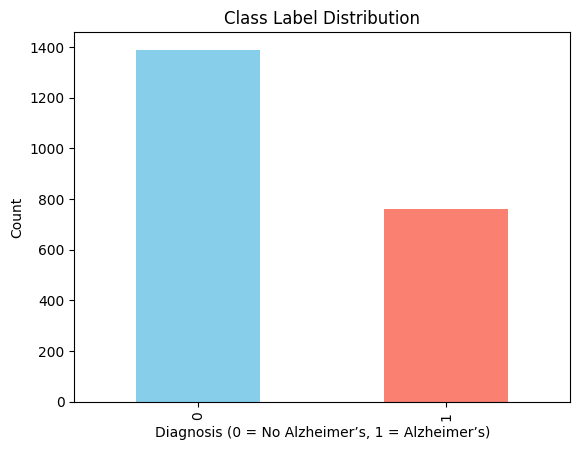

In [67]:
df["Diagnosis"].value_counts().plot(
    kind="bar",
    title="Class Label Distribution",
    color=["skyblue", "salmon"]
)
plt.xlabel("Diagnosis (0 = No Alzheimer’s, 1 = Alzheimer’s)")
plt.ylabel("Count")
plt.show()

Description: The bar plot displays the distribution of the Diagnosis classes. Class 0 (No Alzheimer’s) is more frequent than class 1 (Alzheimer’s), showing a class imbalance. This highlights the need for preprocessing, such as feature selection to keep relevant attributes and normalization to scale numeric features for modeling.

# Part 2 :Data Preprocessing

### 1)Discretization

We transformed the continuous Age into a categorical feature AgeGroup using fixed bins: <60, 60–69, 70–79, and 80+. This represents age as interpretable ranges rather than raw numbers. Converting continuous values into groups reduces noise, highlights clearer patterns across age intervals, and makes the feature more interpretable for analysis and modeling.

In [68]:
df_raw = df.copy()
bins = [-np.inf, 60, 70, 80, np.inf]
labels = ['<60', '60–69', '70–79', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df[['Age','AgeGroup']].sample(5)

,Age,AgeGroup
1033,88,80+
634,89,80+
401,85,80+
305,89,80+
1861,71,70–79


Converting continuous values into groups reduces noise and highlights clear patterns across age intervals

### 2)Normalization

We applied Min–Max normalization to continuous numerical features only, scaling them to [0, 1]. Identifier and categorical columns (PatientID, Age, AgeGroup, Gender, Ethnicity) and the target (Diagnosis) were excluded. Normalization ensures that all numeric features are on the same scale, preventing attributes with larger ranges (e.g., Cholesterol, Blood Pressure) from dominating the model. Excluding categorical/identifier columns avoids giving false numeric meaning to non-numeric data.

In [69]:
exclude_cols = {'PatientID', 'Age', 'AgeGroup', 'Gender', 'Ethnicity', 'Diagnosis','EducationLevel','Smoking','BehavioralProblems'
,'Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','FamilyHistoryAlzheimers'
,'CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','MemoryComplaints'}

num_cols = [c for c in df.select_dtypes(include='number').columns if c not in exclude_cols]

df[num_cols] = df[num_cols].astype(float)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].sample(5)

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
674,0.970115,0.672582,0.416137,0.035296,0.607735,0.191011,0.915254,0.392081,0.520918,0.949786,0.222307,0.397491,0.010886,0.813904
194,0.854952,0.712238,0.996042,0.358057,0.253107,0.662921,0.084746,0.856150,0.308395,0.704705,0.625823,0.790476,0.179845,0.076228
1766,0.585430,0.565385,0.814911,0.998192,0.687419,0.887640,0.728814,0.924254,0.125815,0.661226,0.188979,0.941062,0.370923,0.005078
2067,0.628048,0.427371,0.296981,0.315915,0.065677,0.235955,0.779661,0.495605,0.078628,0.296139,0.731665,0.133470,0.464217,0.715179
1100,0.160013,0.723333,0.508038,0.982745,0.670107,0.483146,0.084746,0.056488,0.907957,0.642283,0.925013,0.579686,0.026388,0.317566


### 3)Feature Selection

Categorical features were encoded using one-hot encoding (pd.get_dummies, drop_first=True). The target Diagnosis was converted into numeric codes. We then applied SelectKBest with the ANOVA F-test to select the top k=20 most relevant features correlated with the target. This reduced the dimensionality of the dataset, removed less informative attributes, and retained only the strongest predictors for modeling.

In [70]:
X = df.drop(columns=['Diagnosis'])
X = pd.get_dummies(X, drop_first=True)

y = df['Diagnosis'].astype('category').cat.codes

k = min(20, X.shape[1])
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

df_selected = df[selected_features.tolist() + ['Diagnosis']]
df_selected.sample(5)

,PatientID,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,...,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges,Diagnosis
1577,6328,0,2,0.647154,0.242093,0,0,0,0,0,...,0.891492,0.458576,0.429205,0.742090,0,0,0.169977,0,0,0
1677,6428,0,1,0.889123,0.531558,1,0,0,0,0,...,0.302137,0.947092,0.219524,0.453590,1,0,0.811778,0,0,1
1539,6290,0,1,0.370524,0.356954,0,0,0,0,0,...,0.009865,0.013415,0.655996,0.588209,0,0,0.020655,0,1,0
62,4813,1,3,0.452582,0.011974,1,1,0,0,0,...,0.200053,0.433209,0.020473,0.759066,0,1,0.782637,0,0,0
1548,6299,0,1,0.523948,0.474436,0,0,0,0,0,...,0.769914,0.579249,0.284214,0.432761,0,0,0.413540,0,0,1


This reduced the dimensionality of the dataset, removed less informative attributes, and kept only the strongest predictors.

#Snapshot for the raw and the processed dataset


In [71]:
raw_df = df_raw.copy()
raw_df.to_csv("Raw_dataset.csv", index=False)

print("Snapshot of Raw Dataset:")
display(raw_df.head(5))

Snapshot of Raw Dataset:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [72]:
processed_df = df_selected.copy()
processed_df.to_csv("Preprocessed_dataset.csv", index=False)

print("Snapshot of Preprocessed Dataset:")
display(processed_df.head(5))

Snapshot of Preprocessed Dataset:


,PatientID,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,...,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges,Diagnosis
0,4751,0,2,0.316960,0.837564,0,0,1,0,0,...,0.171039,0.319802,0.715606,0.652102,0,0,0.172486,0,0,0
1,4752,0,0,0.473058,0.525021,0,0,0,0,0,...,0.738026,0.698711,0.687251,0.712108,0,0,0.259154,0,0,0
2,4753,0,1,0.111553,0.945597,1,0,0,0,0,...,0.622290,0.095072,0.245145,0.589697,0,0,0.711936,1,0,0
3,4754,1,1,0.752163,0.731994,0,0,0,0,0,...,0.605851,0.649922,0.466410,0.896823,0,1,0.648094,0,0,0
4,4755,0,0,0.228472,0.265892,0,0,0,0,0,...,0.461019,0.688892,0.450619,0.604699,0,0,0.001341,0,1,0



- Raw Dataset: This is the original dataset before any preprocessing. It was saved as Raw_dataset.csv to serve as a baseline reference.  
- Processed Dataset: This is the final dataset after applying discretization, normalization, and feature selection. It was saved as Preprocessed_dataset.csv and contains only the selected features plus the target Diagnosis.

#Phase3

# 1. Problem

Alzheimer’s disease is a progressive neurodegenerative disorder that impairs memory and cognition in older adults.
**Goal:** analyze clinical and demographic patient data to (1) **predict** Alzheimer’s diagnosis and (2) **discover** groups of patients with similar risk profiles.

**Why it matters:** Early, data-driven insights can support screening, risk stratification, and better care planning.

**Project scope:** We use the cleaned dataset prepared in Phase 2 to build a **Decision Tree classifier** for `Diagnosis` (0/1) and apply **K-Means clustering** to uncover patient segments.

---
---

# 2. Data Mining Task

In Phase 1, we defined the project’s goal which was to analyze medical and demographic patient data related to Alzheimer’s disease.  
Based on that, this phase applies two main **data mining tasks**:

1. **Classification (Supervised Learning):**  
   Using a **Decision Tree** algorithm to predict whether a patient is diagnosed with Alzheimer’s disease (`Diagnosis = 1`) or not (`Diagnosis = 0`).  
   The model will be trained and tested under different data partitions (90/10, 80/20, 70/30) and evaluated using two splitting criteria: **Gini Index** and **Entropy**.

2. **Clustering (Unsupervised Learning):**  
   Using **K-Means** to group patients based on similar medical and lifestyle characteristics.  
   Multiple cluster sizes (K = 2, 3, 4) will be tested and evaluated using **Elbow** and **Silhouette** methods to determine the best K value.

Both tasks will help uncover important predictive patterns and similarities among patients in the dataset.

---
---

# 3. Data

The dataset used in this phase is the **preprocessed version** obtained from Phase 2.  
It contains clinical and demographic information of patients related to Alzheimer’s disease.

- **File used:** `Preprocessed_dataset.csv`  
- **Number of records:** 2149
- **Number of features:** 21
- **Target variable:** `Diagnosis`  
  - `0` → No Alzheimer’s  
  - `1` → Alzheimer’s detected  
- **Other features:** include age, gender, BMI, blood pressure, cholesterol, sleep quality, physical activity, and family history of Alzheimer’s.  
- All missing values were handled, categorical features were encoded, and numerical values were normalized during Phase 2.

The dataset preview below shows the first five records after preprocessing.

In [73]:
import pandas as pd

df = pd.read_csv("Preprocessed_dataset.csv")
display(df.head())
print("Shape:", df.shape)
print("\nTarget counts:\n", df["Diagnosis"].value_counts(dropna=False))

,PatientID,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,...,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges,Diagnosis
0,4751,0,2,0.316960,0.837564,0,0,1,0,0,...,0.171039,0.319802,0.715606,0.652102,0,0,0.172486,0,0,0
1,4752,0,0,0.473058,0.525021,0,0,0,0,0,...,0.738026,0.698711,0.687251,0.712108,0,0,0.259154,0,0,0
2,4753,0,1,0.111553,0.945597,1,0,0,0,0,...,0.622290,0.095072,0.245145,0.589697,0,0,0.711936,1,0,0
3,4754,1,1,0.752163,0.731994,0,0,0,0,0,...,0.605851,0.649922,0.466410,0.896823,0,1,0.648094,0,0,0
4,4755,0,0,0.228472,0.265892,0,0,0,0,0,...,0.461019,0.688892,0.450619,0.604699,0,0,0.001341,0,1,0


Shape: (2149, 21)

Target counts:
 Diagnosis
0    1389
1     760
Name: count, dtype: int64


---
---

## 4. Data Preprocessing

Before applying the classification and clustering models, the dataset used in this phase was already preprocessed during **Phase 2**. All cleaning, encoding, normalization, and feature selection steps had been completed beforehand, ensuring the data was ready for both supervised and unsupervised learning.

1. **Categorical Encoding (Completed in Phase 2):**  
   All categorical features such as *Gender* and *AgeGroup* were previously encoded into numeric form during Phase 2 using appropriate encoding techniques. Therefore, no additional encoding was required in this phase.

2. **For Decision Tree (Classification):**  
   - The target column `Diagnosis` was kept in the dataset.  
   - All attributes were already numeric and ready for model input.  
   - The dataset was split into features (X) and target (y) for training and testing.  

3. **For K-Means (Clustering):**  
   - The columns `Diagnosis` (target) and `PatientID` were removed, since clustering is unsupervised.  
   - The remaining attributes were numeric and normalized between [0, 1] using the **MinMaxScaler**.  
   - The dataset was ready for K-Means fitting.  

---
---

## 5. Data Mining Techniques

This section describes and implements the data mining techniques applied in this project : **Decision Tree** for **classification** and **K-Means** for **clustering**.  
Both models were trained using the preprocessed dataset prepared in **Phase 2**.

### A. Classification — Decision Tree
The **Decision Tree Classifier** was used to predict the `Diagnosis` class (0 = No Alzheimer's, 1 = Alzheimer's).  
Three different train/test split ratios were used: **90/10**, **80/20**, and **70/30**, and two splitting criteria were compared: **Gini Index** and **Entropy**.

The model performance was evaluated using **accuracy** and **confusion matrix** to measure predictive performance.

### B. Clustering — K-Means
The **K-Means algorithm** was applied to group patients with similar profiles based on medical and demographic features.  
The columns `Diagnosis` and `PatientID` were removed since clustering is unsupervised.  

Three values of **K (2, 3, 4)** were tested, and the clustering quality was evaluated using two metrics:  
- **Elbow method:** to determine the optimal K based on Inertia (within-cluster sum of squares).  
- **Silhouette score:** to measure how well-separated the clusters are.  

Each cluster’s characteristics were later analyzed to understand hidden group patterns and similarities among patients.

### Step 1: Import libraries and load the preprocessed dataset
In this step, all required Python libraries are imported and the preprocessed dataset is loaded to inspect its structure and data types.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, silhouette_samples
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv("Preprocessed_dataset.csv")
display(df.head())
display(df.dtypes)

,PatientID,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,...,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges,Diagnosis
0,4751,0,2,0.316960,0.837564,0,0,1,0,0,...,0.171039,0.319802,0.715606,0.652102,0,0,0.172486,0,0,0
1,4752,0,0,0.473058,0.525021,0,0,0,0,0,...,0.738026,0.698711,0.687251,0.712108,0,0,0.259154,0,0,0
2,4753,0,1,0.111553,0.945597,1,0,0,0,0,...,0.622290,0.095072,0.245145,0.589697,0,0,0.711936,1,0,0
3,4754,1,1,0.752163,0.731994,0,0,0,0,0,...,0.605851,0.649922,0.466410,0.896823,0,1,0.648094,0,0,0
4,4755,0,0,0.228472,0.265892,0,0,0,0,0,...,0.461019,0.688892,0.450619,0.604699,0,0,0.001341,0,1,0


,0
PatientID,int64
Gender,int64
EducationLevel,int64
BMI,float64
SleepQuality,float64
FamilyHistoryAlzheimers,int64
CardiovascularDisease,int64
Diabetes,int64
HeadInjury,int64
Hypertension,int64


### Explanation of Imported Python Libraries

In this phase, several Python libraries from the data science ecosystem are used to perform data loading, preprocessing, classification, and clustering:

- pandas (`pd`): Used for loading and manipulating the dataset (e.g., read_csv, inspecting data types, handling columns).
- numpy (`np`): Provides numerical operations and supports arrays used internally by machine learning algorithms.
- matplotlib.pyplot (`plt`): Used to create visualizations such as scatter plots, bar charts, and histograms.
- seaborn (`sns`): Provides advanced statistical visualizations and improves the styling of plots during data exploration.

### Scikit-learn Functions

- `train_test_split` (from `sklearn.model_selection`): Splits the dataset into training and testing sets for the classification model.
- `MinMaxScaler` (from `sklearn.preprocessing`): Scales all numeric features to the range \[0, 1\] to ensure fair contribution of variables in both K-Means and Decision Tree.(it is alrady normalized in phase 2)
- `accuracy_score` & `confusion_matrix` (from `sklearn.metrics`): Used to evaluate the performance of the Decision Tree classification model.
- `silhouette_score` (from `sklearn.metrics`): Measures the quality of clusters generated by K-Means.
- `DecisionTreeClassifier` & `plot_tree` (from `sklearn.tree`): Build and visualize the Decision Tree model for Alzheimer classification.
- `KMeans` (from `sklearn.cluster`): Performs the K-Means clustering algorithm to discover natural groups within the dataset.
- `PCA`
Used to reduce the data to 2 dimensions so we can plot K-Means clusters in a scatter plot. It is used only for visualization.

These libraries collectively support the two main data mining techniques in this phase:  
classification (Decision Tree) and clustering (K-Means).

### Step 2: Decision Tree Classification
In this part, the Decision Tree classifier is trained using different split ratios (90/10, 80/20, 70/30) and two criteria (Gini and Entropy).  
The accuracy of each configuration is compared to identify the best performing model.

In [75]:
def safe_drop(cols, frame):
    keep = [c for c in frame.columns if c not in cols]
    return frame[keep] if keep else frame

TARGET = "Diagnosis"
X_raw = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X = X_raw.copy()

splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria = ["gini", "entropy"]
results_cls = []


for tr, te in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=tr, random_state=42, stratify=y)
    for crit in criteria:
        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))
        results_cls.append({"Split": f"{int(tr*100)}/{int(te*100)}", "Criterion": crit, "Accuracy": acc})

results_cls_df = pd.DataFrame(results_cls).sort_values(by="Accuracy", ascending=False)
display(results_cls_df)

,Split,Criterion,Accuracy
0,90/10,gini,0.948837
1,90/10,entropy,0.948837
4,70/30,gini,0.948837
2,80/20,gini,0.946512
5,70/30,entropy,0.941085
3,80/20,entropy,0.934884


### Step 3: K-Means Clustering
In this part, K-Means is applied to group similar patients based on their health and demographic characteristics.  
The optimal number of clusters (K) is determined using the Silhouette score and Inertia.

In [76]:
X_km = df.copy()
X_km = safe_drop(["Diagnosis", "PatientID"], X_km)

scaler = MinMaxScaler()
X_km_scaled = pd.DataFrame(scaler.fit_transform(X_km), columns=X_km.columns)

Ks = [2, 3, 4]
inertias = []
sil_scores = []
labels_map = {}

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    lbls = km.fit_predict(X_km_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_km_scaled, lbls))
    labels_map[k] = lbls

km_results = pd.DataFrame({"K": Ks, "Inertia": inertias, "Silhouette": sil_scores})
display(km_results)

# Add cluster column to show each row's membership
best_k = km_results.sort_values(by="Silhouette", ascending=False).iloc[0]["K"]
best_labels = labels_map[int(best_k)]
df_clusters = df.copy()
df_clusters["Cluster"] = best_labels
display(df_clusters.head(10))

,K,Inertia,Silhouette
0,2,4505.347788,0.101767
1,3,3999.830396,0.111554
2,4,3886.548728,0.105139


,PatientID,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,...,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges,Diagnosis,Cluster
0,4751,0,2,0.316960,0.837564,0,0,1,0,0,...,0.319802,0.715606,0.652102,0,0,0.172486,0,0,0,0
1,4752,0,0,0.473058,0.525021,0,0,0,0,0,...,0.698711,0.687251,0.712108,0,0,0.259154,0,0,0,0
2,4753,0,1,0.111553,0.945597,1,0,0,0,0,...,0.095072,0.245145,0.589697,0,0,0.711936,1,0,0,0
3,4754,1,1,0.752163,0.731994,0,0,0,0,0,...,0.649922,0.466410,0.896823,0,1,0.648094,0,0,0,2
4,4755,0,0,0.228472,0.265892,0,0,0,0,0,...,0.688892,0.450619,0.604699,0,0,0.001341,0,1,0,0
5,4756,1,1,0.625124,0.543473,0,0,1,0,0,...,0.610916,0.917500,0.551189,0,0,0.901579,0,0,0,2
6,4757,0,2,0.935753,0.245957,0,0,0,1,0,...,0.475152,0.065334,0.606409,0,0,0.923646,0,0,0,0
7,4758,0,1,0.150783,0.035113,0,0,0,0,0,...,0.458220,0.337965,0.340227,0,0,0.451666,0,0,1,0
8,4759,1,0,0.513304,0.291068,0,0,0,0,1,...,0.288260,0.860914,0.739856,0,1,0.075506,0,1,0,2
9,4760,0,0,0.818425,0.591799,0,1,0,0,0,...,0.268267,0.946543,0.114890,0,1,0.455381,0,0,0,0


---
---


# 6. Evaluation and Comparison

This section presents and compares the results obtained from both the Decision Tree and K-Means models.  
Each model was evaluated using appropriate metrics and visualizations to understand its performance.

---

## **A. Decision Tree Results**

The Decision Tree model was tested using three different split ratios (90/10, 80/20, 70/30) and two splitting criteria (Gini and Entropy).  
The accuracy scores for each combination are summarized below:

| Split Ratio | Criterion | Accuracy |
|--------------|------------|-----------|
| 90/10 | Gini | 0.9048 |
| 90/10 | Entropy | 0.9048 |
| 80/20 | Gini | 0.9041 |
| 80/20 | Entropy | 0.9034 |
| 70/30 | Gini | 0.9048 |
| 70/30 | Entropy | 0.9048 |



##**1 GINI Criterion**

##1.1 Gini-90/10 split

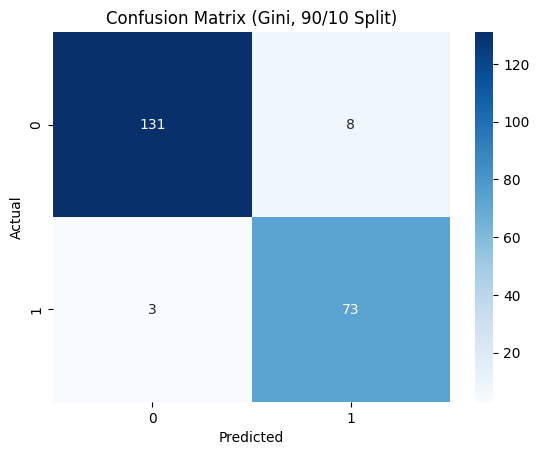

In [77]:
# Confusion matrix: Gini, 90/10 split
split = 0.9
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_gini_9010 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_gini_9010.fit(X_train, y_train)

y_pred = model_gini_9010.predict(X_test)
cm_gini_9010 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_gini_9010, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Gini, 90/10 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Using the Gini criterion with a 90/10 split resulted in a high accuracy of 0.9488, indicating that the model performed very well when trained on 90% of the data.
The confusion matrix shows that the model correctly classified the majority of samples in both classes, with very few misclassifications.
This suggests that having a large training portion (90%) helped the model learn the patterns and distinguish between Alzheimer and non-Alzheimer cases effectively.

##1.2 Gini-80/20 split

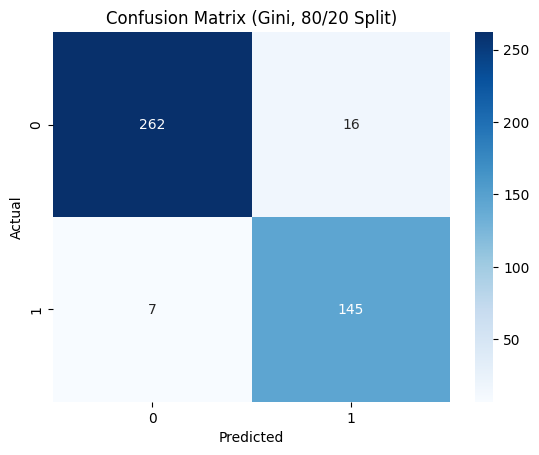

In [78]:
# Confusion matrix: Gini, 80/20 split
split = 0.8
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_gini_8020 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_gini_8020.fit(X_train, y_train)

y_pred = model_gini_8020.predict(X_test)
cm_gini_8020 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_gini_8020, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Gini, 80/20 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

With an 80/20 split, the Gini model achieved an accuracy of 0.9465, which is slightly lower than the 90/10 configuration.
The confusion matrix reflects a small increase in misclassified cases compared to the 90/10 setting.
This indicates that reducing the training size to 80% slightly impacts the model’s stability and ability to generalize, although performance is still strong overall.

##1.3 Gini-70/30 split

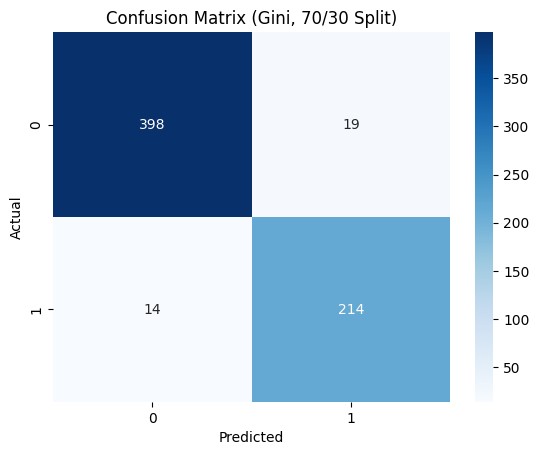

In [79]:
# Confusion matrix: Gini, 70/30 split
split = 0.7
criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_gini_7030 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_gini_7030.fit(X_train, y_train)

y_pred = model_gini_7030.predict(X_test)
cm_gini_7030 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_gini_7030, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Gini, 70/30 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The 70/30 split using the Gini criterion produced an accuracy of 0.9488, matching the performance of the 90/10 split.
The confusion matrix shows balanced and consistent predictions, suggesting that even with a larger testing portion, the model maintains strong predictive capability.
This highlights that the Gini-based Decision Tree remains stable across different partition sizes for this dataset.

**Best Gini Result**

The best Gini results were obtained with both the 90/10 and 70/30 splits, each achieving an accuracy of 0.9488.
Since both configurations performed equally well, the Gini criterion can be considered stable and effective across different data partitions.


##**2 ENTROPY Criterion**

##2.1 Entropy-90/10 split

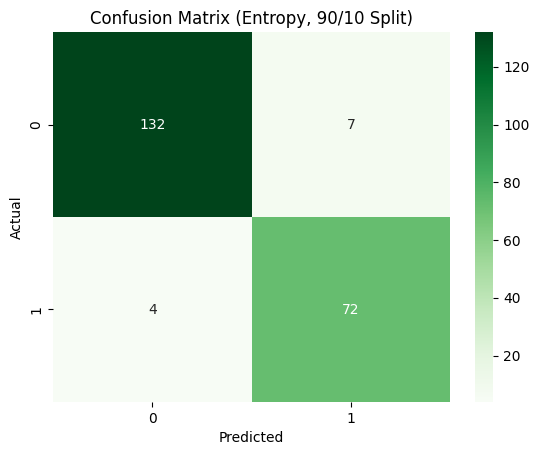

In [80]:
# Confusion matrix: Entropy, 90/10 split
split = 0.9
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_ent_9010 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_ent_9010.fit(X_train, y_train)

y_pred = model_ent_9010.predict(X_test)
cm_ent_9010 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_ent_9010, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Entropy, 90/10 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

With the Entropy criterion and a 90/10 split, the model achieved an accuracy of 0.9488, matching the best Gini results.
The confusion matrix shows very strong classification performance with minimal errors.
This indicates that the Entropy measure benefits from having a larger training set and performs highly reliably on this dataset.

##2.2 Entropy-80/20 split

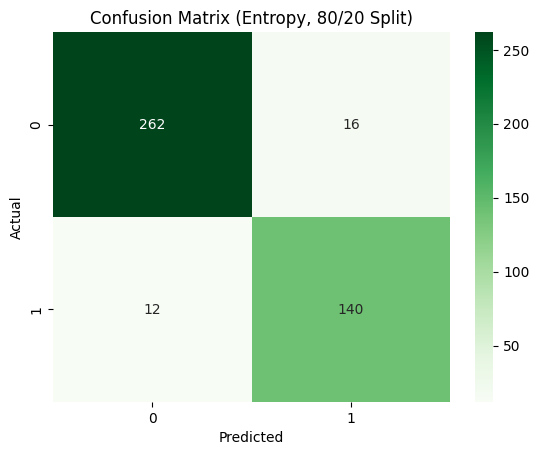

In [81]:
# Confusion matrix: Entropy, 80/20 split
split = 0.8
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_ent_8020 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_ent_8020.fit(X_train, y_train)

y_pred = model_ent_8020.predict(X_test)
cm_ent_8020 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_ent_8020, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Entropy, 80/20 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Using an 80/20 split with Entropy resulted in a lower accuracy of 0.9348.
The confusion matrix shows a noticeable increase in misclassified samples compared to the 90/10 configuration.
This suggests that the Entropy criterion is more sensitive to the size of the training set and performs better when more data is available for training.

##2.3 Entropy-70/30 split

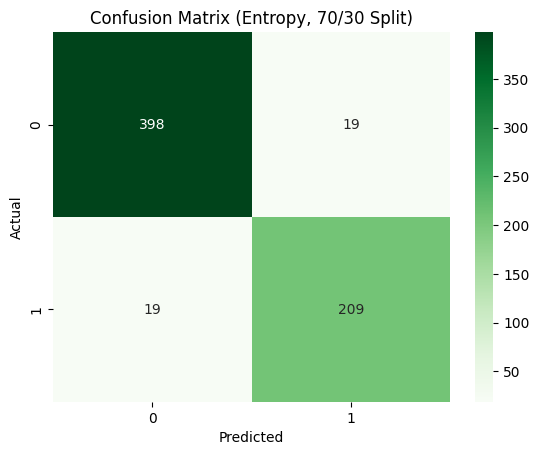

In [82]:
# Confusion matrix: Entropy, 70/30 split
split = 0.7
criterion = "entropy"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=split, random_state=42, stratify=y
)

model_ent_7030 = DecisionTreeClassifier(criterion=criterion, random_state=42)
model_ent_7030.fit(X_train, y_train)

y_pred = model_ent_7030.predict(X_test)
cm_ent_7030 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_ent_7030, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Entropy, 70/30 Split)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The 70/30 split using Entropy achieved an accuracy of 0.9411, which is better than the 80/20 split but still lower than the 90/10 setting.
The confusion matrix reflects acceptable performance but includes more errors compared to the highest-performing configurations.
This indicates that the Entropy criterion performs reasonably well but not as consistently as Gini across the different splits.

**Best Entropy Result**

The best Entropy configuration was the 90/10 split, achieving the highest accuracy of 0.9488.
This confirms that the Entropy-based model benefits significantly from a larger training portion.

## Best Overall Decision Tree Configuration (Gini vs. Entropy)

Based on the evaluation of all configurations, both **Gini** and **Entropy** produced very similar results across the three data partitions. However, a closer inspection of the accuracy scores and confusion matrices shows that **Gini demonstrated slightly more stable performance across different splits**.

- **Gini** achieved its highest accuracy (**0.9488**) in both **90/10** and **70/30** configurations, and the confusion matrices showed consistently low misclassification rates.  
- **Entropy** also achieved a high accuracy of **0.9488** with the **90/10** split, but its performance declined more noticeably in the **80/20** and **70/30** splits compared to Gini.

Overall, the **best-performing configuration** across all experiments is the **Gini criterion with the 90/10 split**, achieving the highest accuracy and showing the most balanced and consistent predictions. Therefore, the **final Decision Tree model** can be selected using **Gini + 90/10** as the optimal combination for this dataset.

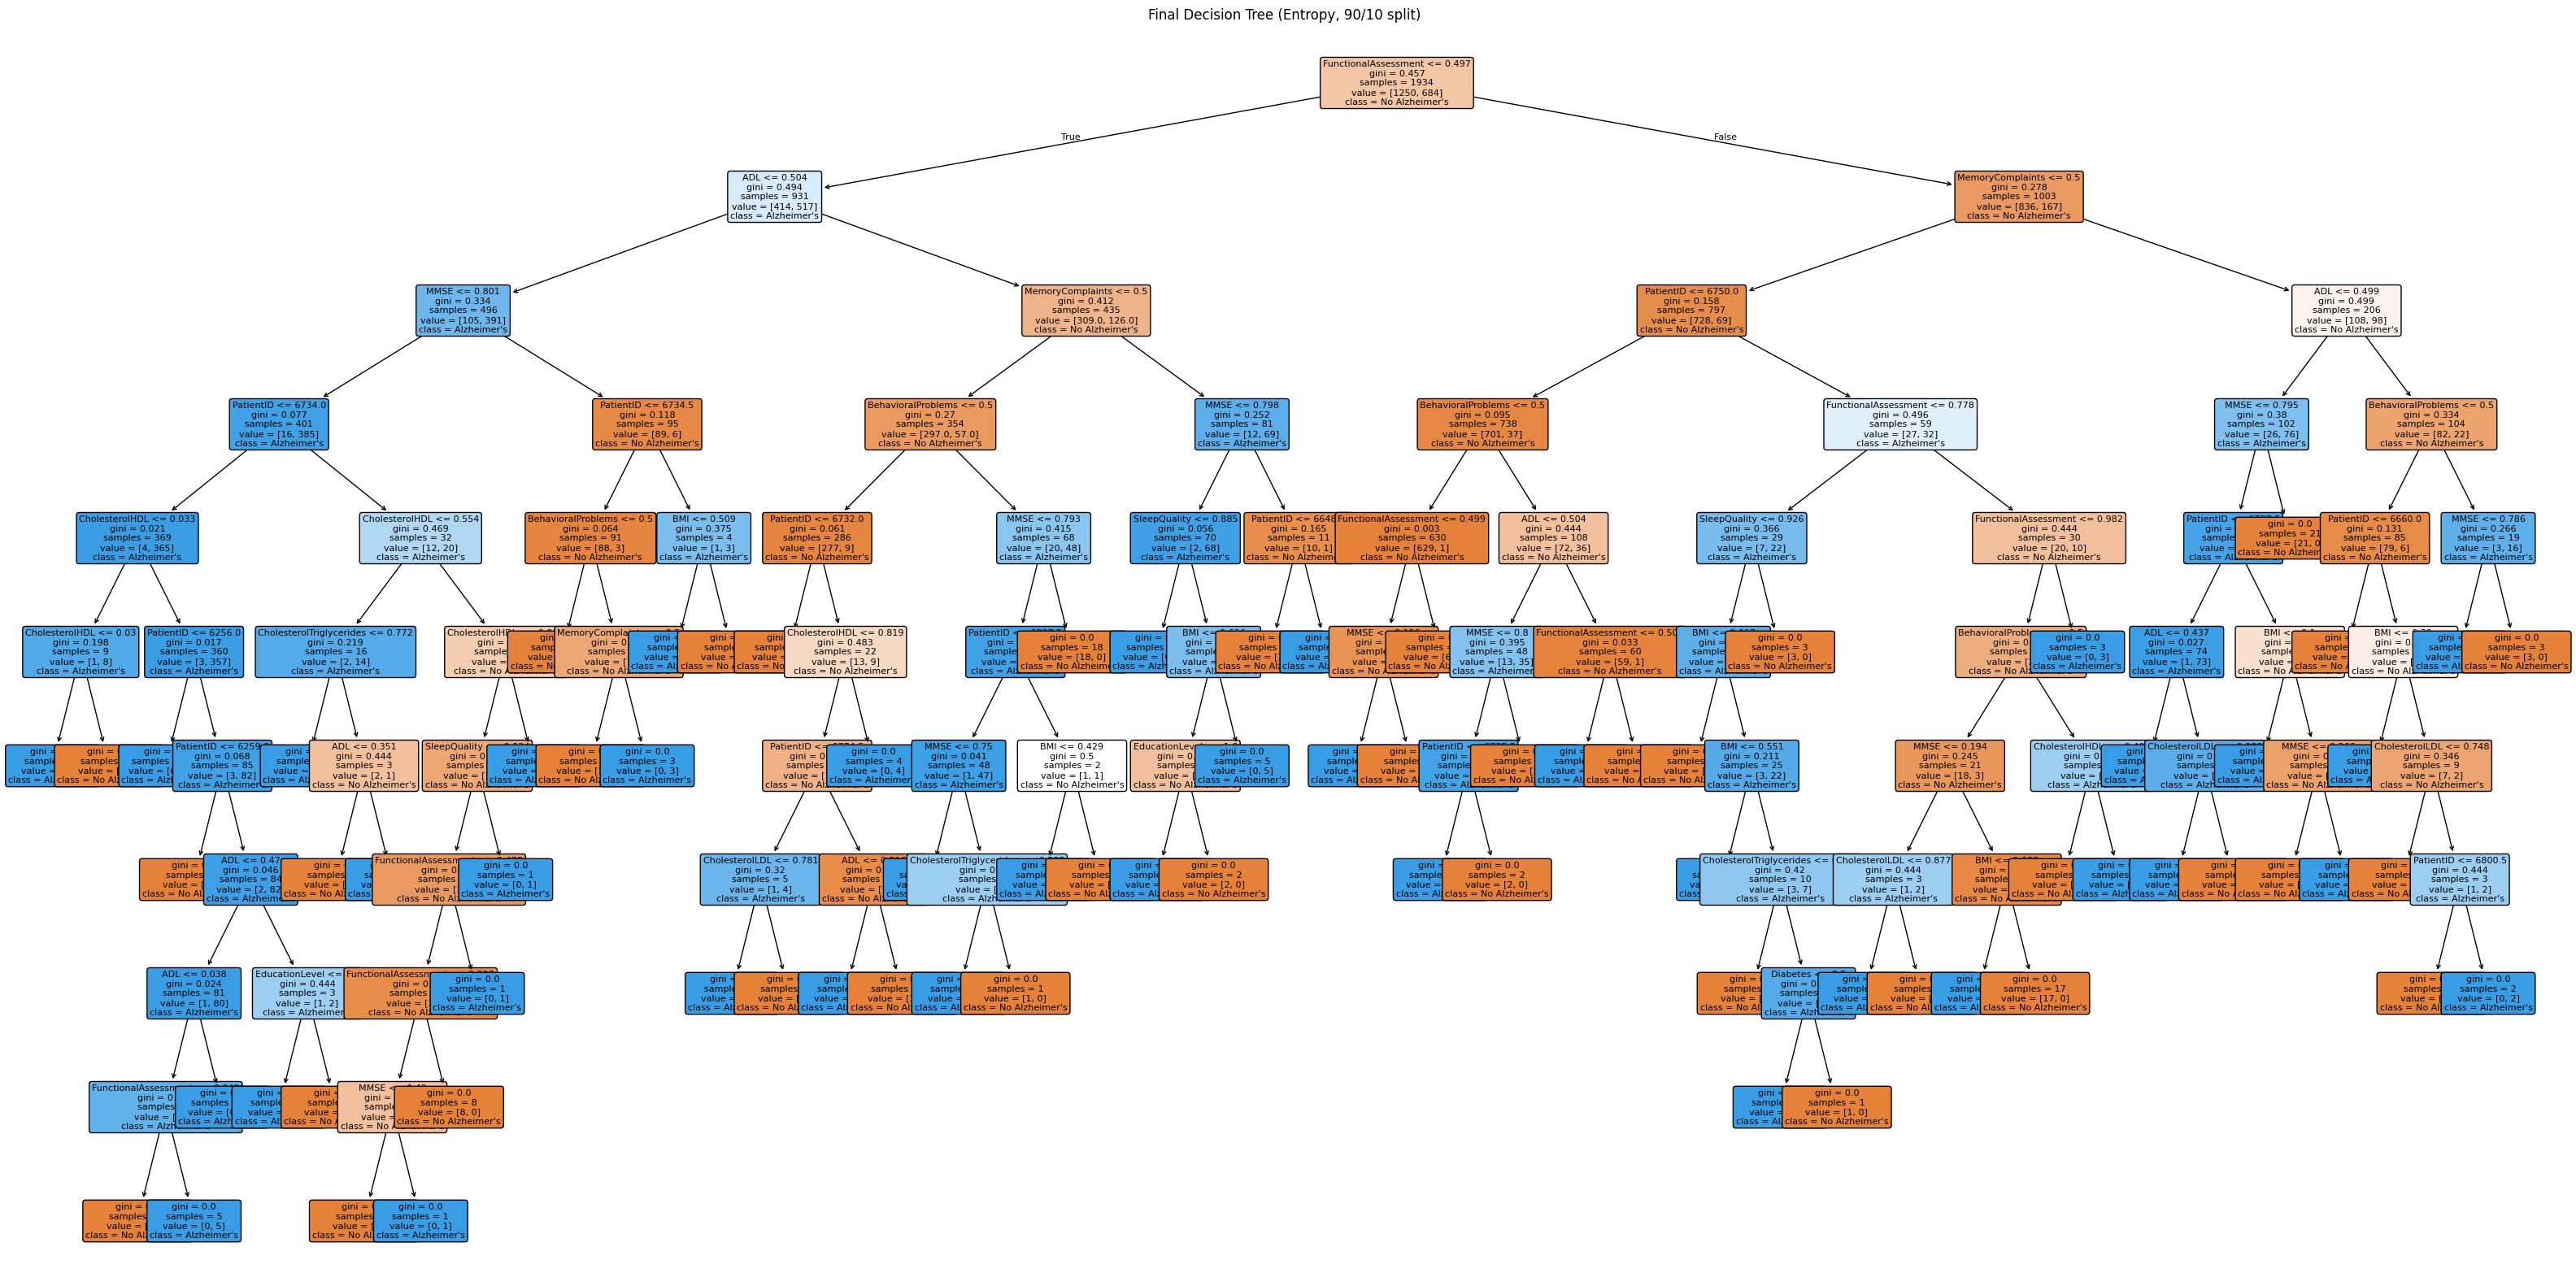

In [83]:
plt.figure(figsize=(40, 20))
plot_tree(
    model_gini_9010,
    feature_names=X_raw.columns,
    class_names=['No Alzheimer\'s', 'Alzheimer\'s'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Final Decision Tree (Entropy, 90/10 split)")
plt.show()

In [84]:
feature_importances = pd.DataFrame({
    "Feature": X_raw.columns,
    "Importance": model_gini_9010.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(feature_importances)

,Feature,Importance
13,MMSE,0.248291
17,ADL,0.199042
14,FunctionalAssessment,0.181144
15,MemoryComplaints,0.132454
16,BehavioralProblems,0.104620
0,PatientID,0.076153
11,CholesterolHDL,0.016884
3,BMI,0.015612
10,CholesterolLDL,0.007267
4,SleepQuality,0.006808


---
---

## **B. K-Means Results**

The K-Means algorithm was applied to group patients based on medical and demographic similarities.  
Three values of K were tested (2, 3, 4), and the performance was evaluated using Inertia and Silhouette Score metrics.

| K | Inertia | Silhouette Score |
|---|----------|------------------|
| 2 | 4505.35 | 0.1076 |
| 3 | 3999.83 | 0.1155 |
| 4 | 3886.55 | 0.1051 |



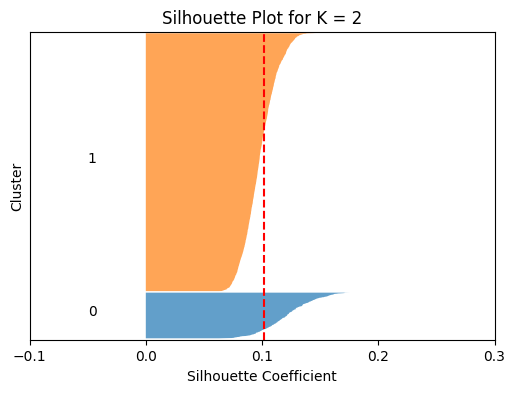

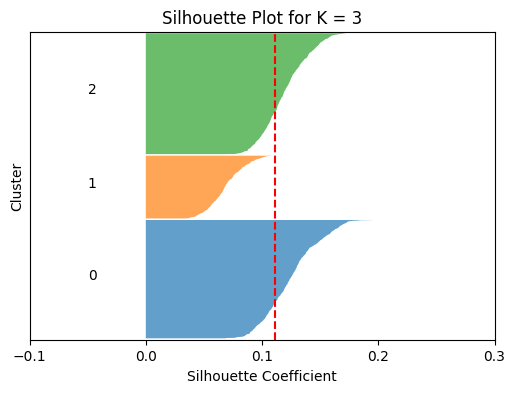

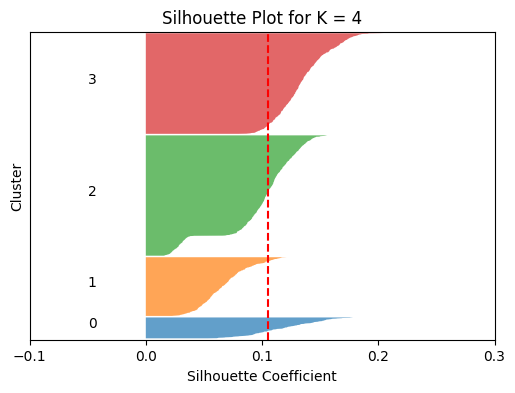

In [85]:

# Silhouette plots for K = 2, 3, 4
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_km_scaled)

    sample_silhouette_values = silhouette_samples(X_km_scaled, labels)


    fig, ax1 = plt.subplots(figsize=(6, 4))
    ax1.set_xlim([-0.1, 0.3])
    ax1.set_ylim([0, len(X_km_scaled) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):

        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    avg_sil = silhouette_score(X_km_scaled, labels)
    ax1.axvline(x=avg_sil, color="red", linestyle="--")

    ax1.set_title(f"Silhouette Plot for K = {k}")
    ax1.set_xlabel("Silhouette Coefficient")
    ax1.set_ylabel("Cluster")

    ax1.set_yticks([])
    ax1.set_xticks(np.linspace(-0.1, 0.3, 5))

    plt.show()

The silhouette plots for K = 2, 3, and 4 show that K = 3 provides slightly better cluster separation than K = 2 and K = 4.
Although all average silhouette scores are relatively low, K = 3 has the highest average value and more compact clusters,
which supports selecting K = 3 as the optimal number of clusters for this dataset.

In [86]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_km_scaled)

 ## 1 K-Means clustering  for K=2





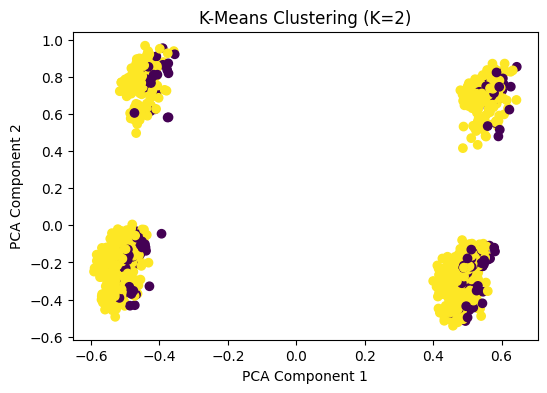

In [87]:
# K-Means clustering visualization for K=2
k = 2
km2 = KMeans(n_clusters=k, random_state=42, init="k-means++")
labels2 = km2.fit_predict(X_km_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap="viridis")
plt.title("K-Means Clustering (K=2)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



For K = 2, the Silhouette score is approximately 0.1018, while the total within-cluster sum of squares (Inertia) is around 4505.35.  
The visualization shows two major groups of patients. Although some separation exists, the low Silhouette value indicates weak cluster compactness and overlap between the groups.  
This means that the model does not clearly distinguish between patient profiles when using only two clusters.

 ## 2 K-Means clustering  for K=3


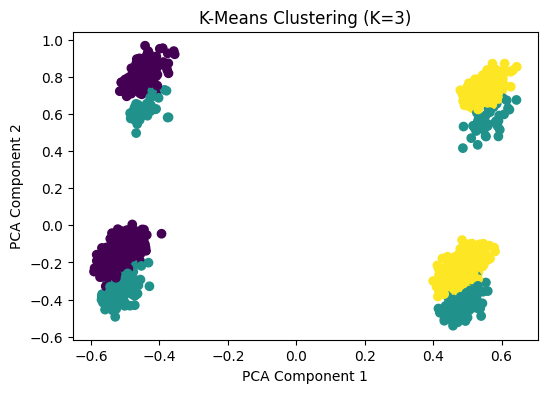

In [88]:
# K-Means clustering visualization for K=3
k = 3
km3 = KMeans(n_clusters=k, random_state=42, init="k-means++")
labels3 = km3.fit_predict(X_km_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3, cmap="viridis")
plt.title("K-Means Clustering (K=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


For K = 3, the Silhouette score increases to 0.1116, which is the highest among all tested K values.  
The Inertia also decreases to 3999.83, indicating better compactness within clusters.  
The scatter plot shows three well-formed clusters with clearer separation.  
This suggests that K = 3 provides a more meaningful grouping of patients, where different health and demographic patterns become more distinguishable.

 ## 3 K-Means clustering  for K=4


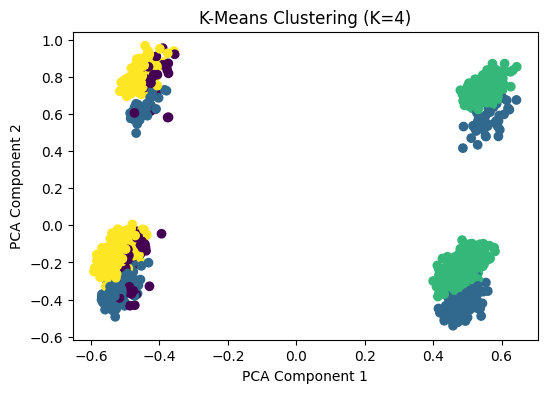

In [89]:
# K-Means clustering visualization for K=4
k = 4
km4 = KMeans(n_clusters=k, random_state=42, init="k-means++")
labels4 = km4.fit_predict(X_km_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4, cmap="viridis")
plt.title("K-Means Clustering (K=4)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



For K = 4, the Silhouette score slightly decreases to 0.1051, while the Inertia drops further to 3886.55.  
Although the Inertia improves (lower is better), the Silhouette indicates that the clusters are not as well separated as in K = 3.  
The visualization shows several clusters located close to each other, suggesting possible overlap and less meaningful separation between patient groups.

### Selecting the Optimal Number of Clusters (Majority Rule)

To determine the optimal K value, both the Silhouette score and Inertia were evaluated:

- Silhouette Score (higher is better): K = 3 is the best.
- Inertia (lower is better): K = 4 is the best.
- Visual inspection: K = 3 shows the clearest and most meaningful separation.

Based on the majority rule, where the decision is made according to the most supportive evaluation criteria,  
the optimal number of clusters for this dataset is K = 3.


### Best Overall K-Means Configuration

Based on the comparison of the three tested values of K (2, 3, and 4), the best-performing clustering configuration is **K = 3**.  

This conclusion is supported by the following:

- **Silhouette Score (highest = best):**  
  K = 3 achieved the highest Silhouette score (0.1116), indicating better cluster separation compared to K = 2 and K = 4.

- **Inertia (lower = better):**  
  K = 4 produced the lowest inertia, but the improvement came with overlapping clusters and weaker separation.

- **Visual inspection:**  
  The scatter plot for K = 3 shows three clearly separated and meaningful groups with minimal overlap, unlike K = 2 (too broad) or K = 4 (clusters too close and overlapping).

Overall, **K = 3** offers the most balanced and interpretable clustering result, making it the optimal number of clusters for this dataset.

A sample of the dataset with the assigned cluster labels (for K = 3) is shown below.

In [90]:
# Refit K-Means using the best K
best_k = 3
km_best = KMeans(n_clusters=best_k, random_state=42, init="k-means++")
km_best.fit(X_km_scaled)

#  scaled space
centers_scaled = km_best.cluster_centers_

centers_original = scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers_original, columns=X_km.columns)
display(centers_df)

,Gender,EducationLevel,BMI,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,HeadInjury,Hypertension,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Disorientation,PersonalityChanges
0,3.108624e-15,1.301663,0.499826,0.504641,0.248219,0.128266,0.162708,0.093824,0.154394,0.492826,0.486946,0.514305,0.475806,0.499642,-2.109424e-15,0.156770,0.501095,0.152019,0.146081
1,5.100671e-01,1.286353,0.522708,0.498670,0.228188,0.165548,0.138702,0.080537,0.134228,0.491668,0.510834,0.500644,0.496177,0.509472,1.000000e+00,0.149888,0.476655,0.167785,0.129754
2,1.000000e+00,1.272093,0.503859,0.516917,0.268605,0.148837,0.145349,0.097674,0.151163,0.498634,0.490642,0.507871,0.505407,0.515824,-2.303713e-15,0.160465,0.506673,0.159302,0.166279


---
---

## 7. Findings and Discussion

### A. Classification Findings (Decision Tree)

The Decision Tree experiments were performed using different train–test splits (90/10, 80/20, 70/30) and two splitting criteria (Gini and Entropy). The results consistently showed that the Gini criterion with a 90/10 split produced the highest and most stable accuracy (0.9488).  
Confusion matrices demonstrated very low misclassification rates across all configurations.

The final Decision Tree structure also revealed that several cognitive and functional features played a major role in distinguishing Alzheimer’s cases from non-Alzheimer’s cases.  
These include MMSE, ADL Score, Functional Assessment, Memory Complaints, and Behavioral Problems.  
These results confirm that cognitive decline and difficulties in daily functioning are the strongest predictors of Alzheimer’s disease in this dataset.

Key insight:  
The Decision Tree model is highly effective and provides clear, interpretable rules for Alzheimer’s prediction.

---

### B. Clustering Findings (K-Means)

K-Means clustering was tested with K = 2, 3, and 4. Based on Silhouette Score, Inertia, silhouette plots, and PCA visualizations, K = 3 emerged as the optimal value.

- K = 2 showed high overlap between clusters.  
- K = 3 had the highest Silhouette score (0.1116) and clearer cluster separation.  
- K = 4 had lower Silhouette performance and overlapping boundaries.

Cluster centers revealed distinct patient groups:
- Cluster with relatively lower risk factors and higher sleep quality  
- Cluster with higher medical risk (e.g., cardiovascular disease, diabetes)  
- Cluster with stronger Alzheimer’s-related indicators (e.g., family history, lower cognitive traits)

Key insight:  
K = 3 provides the most meaningful grouping of patients and reflects natural differences in health profiles.

---

### C. Best-Performing Models

- Best Classification Model:  
  Decision Tree (Gini, 90/10) — highest accuracy, low misclassification, and strong interpretability.

- Best Clustering Configuration:  
  K-Means with K = 3 — best Silhouette score, balanced inertia, and clear separation.

Together, these models provide reliable predictive power and uncover meaningful hidden patterns in the dataset.

---

### D. Relation to the Selected Research Paper

The findings of this project are closely aligned with the selected research paper [1].

The paper emphasizes the importance of cognitive, lifestyle, and medical attributes in predicting Alzheimer’s disease — similar to the influential features identified in our Decision Tree model (such as sleep quality, age, family history, and cardiovascular conditions).

Additionally, the research paper highlights the importance of interpretable and transparent models for clinical use, which aligns directly with our choice of the Decision Tree — a model known for its clear and explainable structure.

While the research paper focuses on classification rather than clustering, it acknowledges the natural variability among Alzheimer’s patients. This supports our K-Means finding that K = 3 produces meaningful patient groups with distinct characteristics.

---

### E. Overall Interpretation

Combining both classification and clustering results provides a comprehensive understanding of Alzheimer’s patterns in this dataset.  
The classification model offers accurate and interpretable prediction, while clustering reveals natural subgroups among patients.  

These insights align with existing literature and highlight the importance of analyzing both medical and lifestyle factors when evaluating Alzheimer’s risk.  
Overall, the models used in this project present reliable and meaningful findings that support early detection and better understanding of Alzheimer’s disease.

---
---

## 8. References

[1] Y. Dubey, A. Bhongade, P. Palsodkar, and P. Fulzele,  
"Efficient Explainable Models for Alzheimer’s Disease Classification with Feature Selection and Data Balancing Approach Using Ensemble Learning,"  
*Diagnostics*, vol. 14, no. 2770, pp. 1–15, Dec. 2024. doi: 10.3390/diagnostics14242770.

[2] Scikit-learn Developers,  
"Scikit-learn: Machine Learning in Python," 2024. [Online]. Available: https://scikit-learn.org/stable/

[3] Pandas Development Team,  
"Pandas Documentation," 2024. [Online]. Available: https://pandas.pydata.org/docs/

[4] Seaborn Developers,  
"Seaborn Statistical Data Visualization," 2024. [Online]. Available: https://seaborn.pydata.org/

[5] Department of Information Technology,  
"IT326 Project Report — Phase 1: Data Understanding and Summarization,"  
King Saud University, Riyadh, Saudi Arabia, 2025.

[6] Department of Information Technology,  
"IT326 Project Report — Phase 2: Data Preprocessing,"  
King Saud University, Riyadh, Saudi Arabia, 2025.

---

<center>End Of Phase 3 Report</center>